In [2]:
# Function to load the data from the file
def load_data(file_path, start, end):
    predictions = []
    ground_truths = []
    
    with open(file_path, 'r') as file:
        for i, line in enumerate(file):
            if i>end:
                break
            if i<start:
                continue
            if line.startswith("Out"):
                parts = line.strip().split(': ')[1].split(' ,')
                prediction = float(parts[0])
                ground_truth = float(parts[1])
                predictions.append(prediction)
                ground_truths.append(ground_truth)
                
    return predictions, ground_truths


In [3]:
# File path
file_path = 'pred'
predictionsRanged = []
ground_truthRanged = []
# Load the data
interval = 5000
for i in range(0, 80000, interval):
    predictions, ground_truths = load_data(file_path,i,i+interval)
    predictionsRanged.append(predictions)
    ground_truthRanged.append(ground_truths)


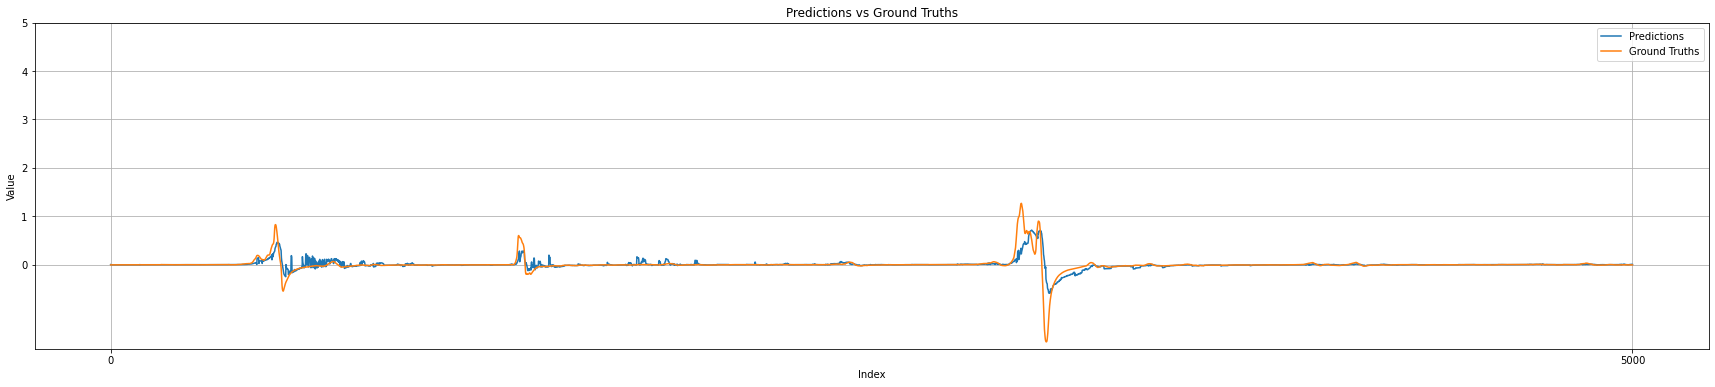

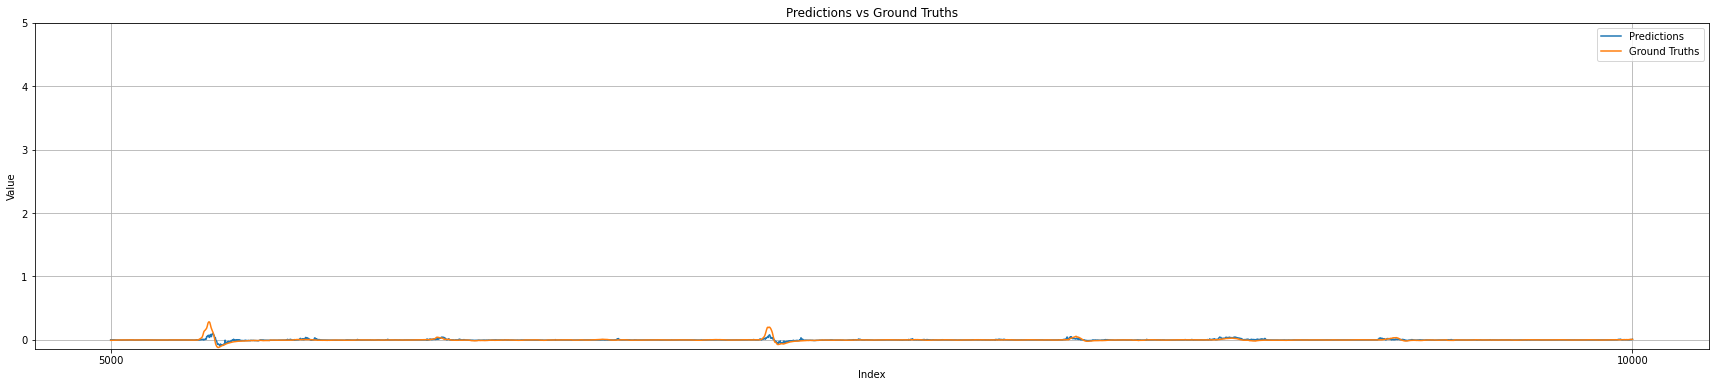

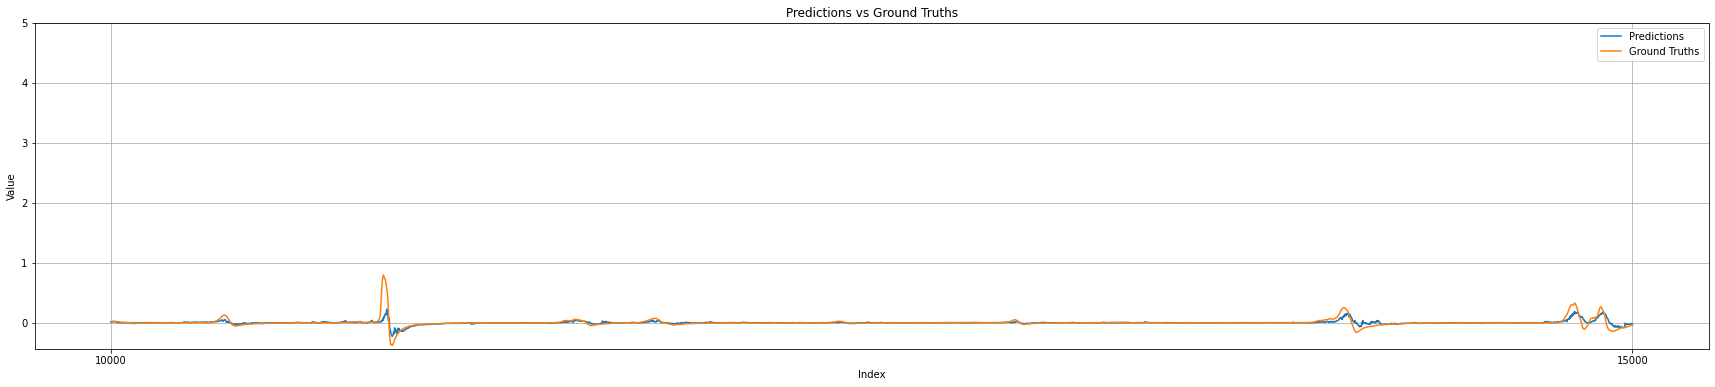

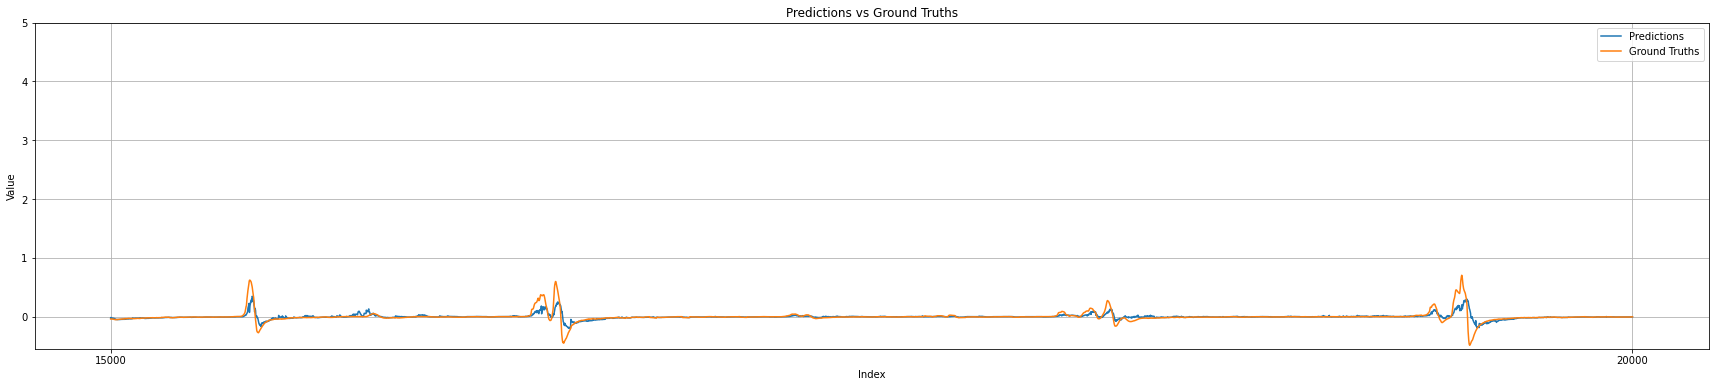

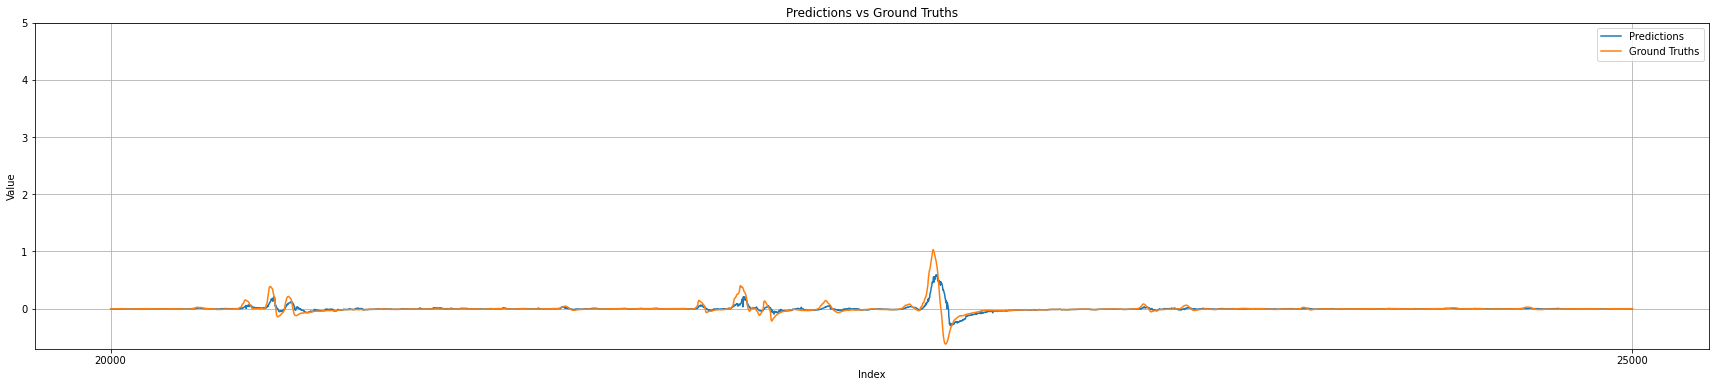

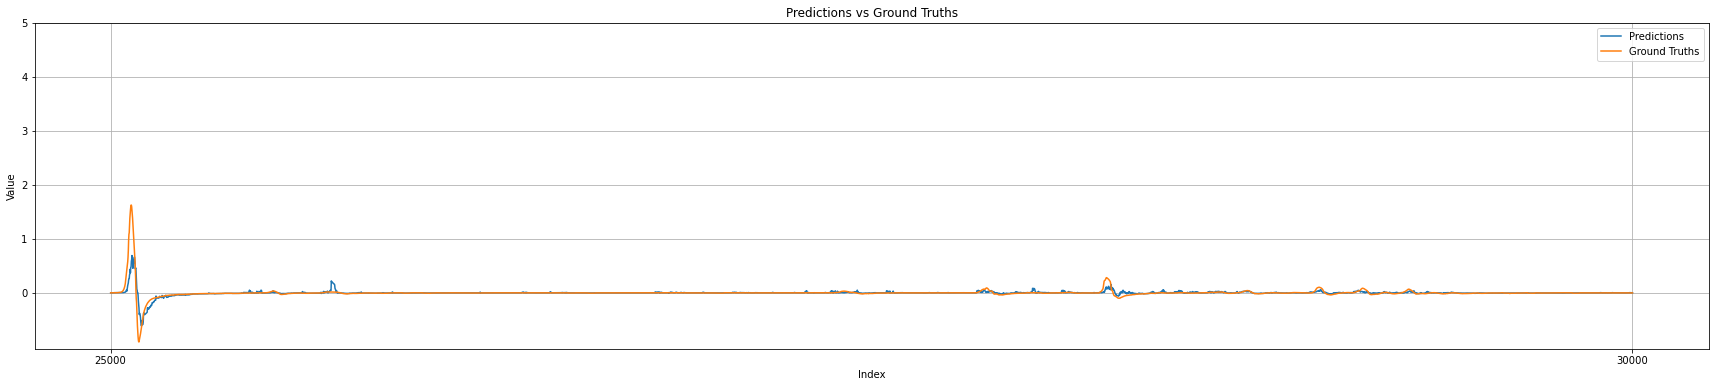

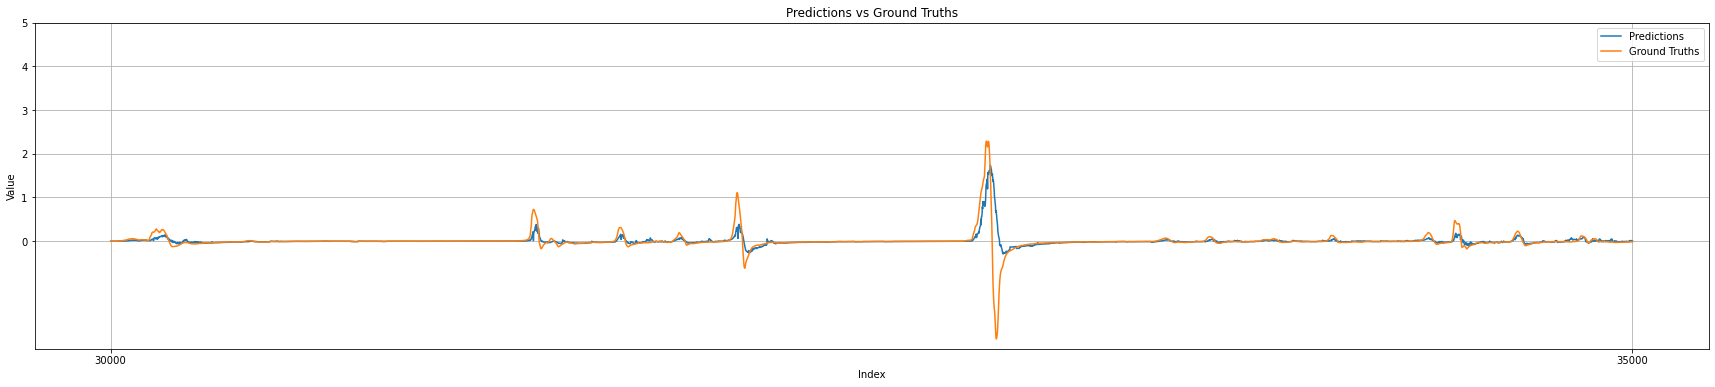

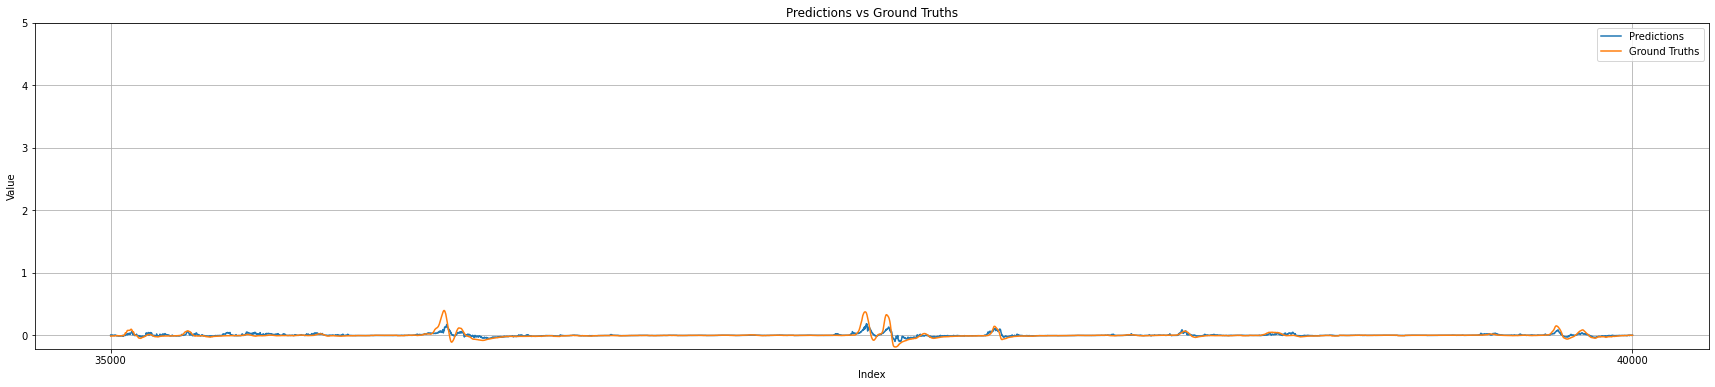

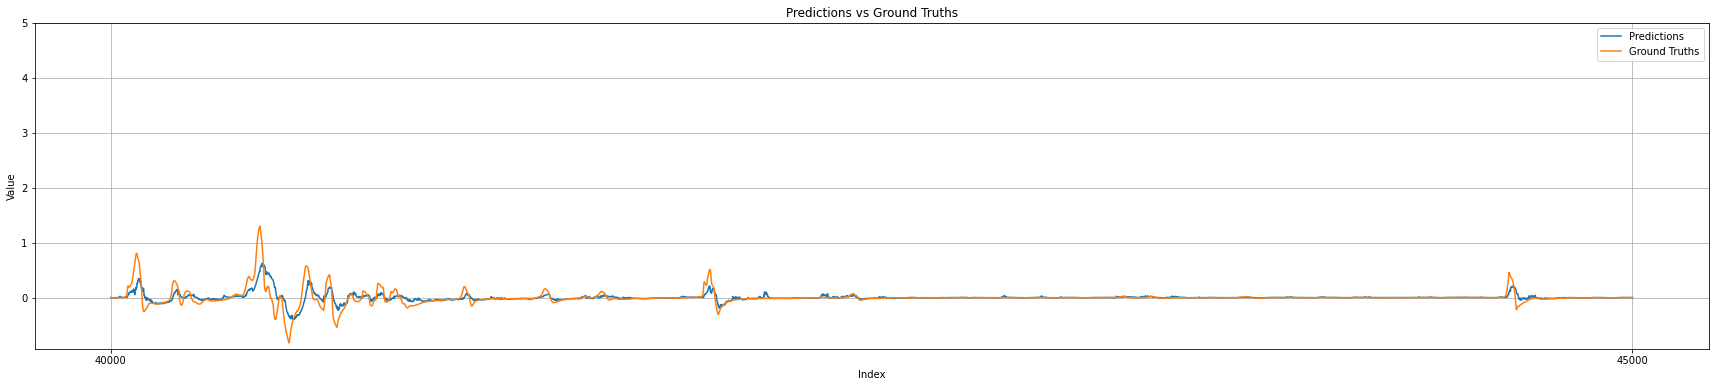

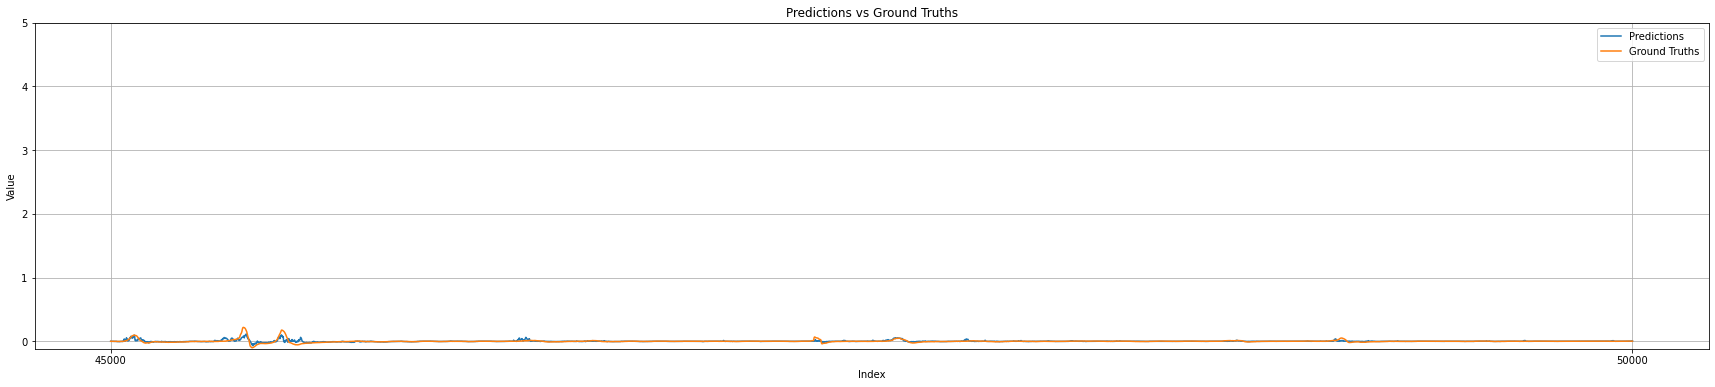

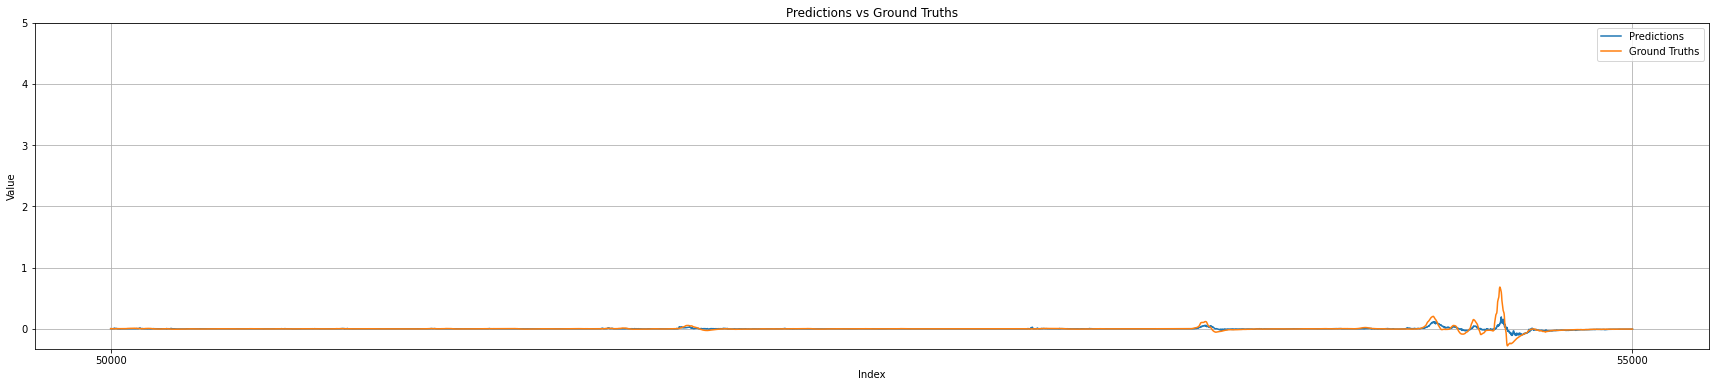

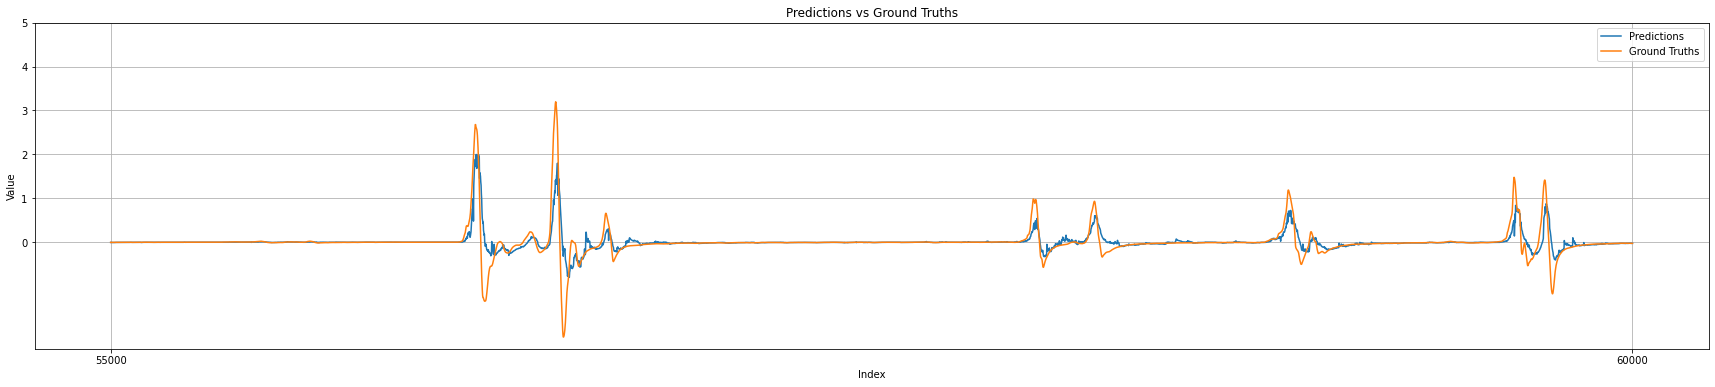

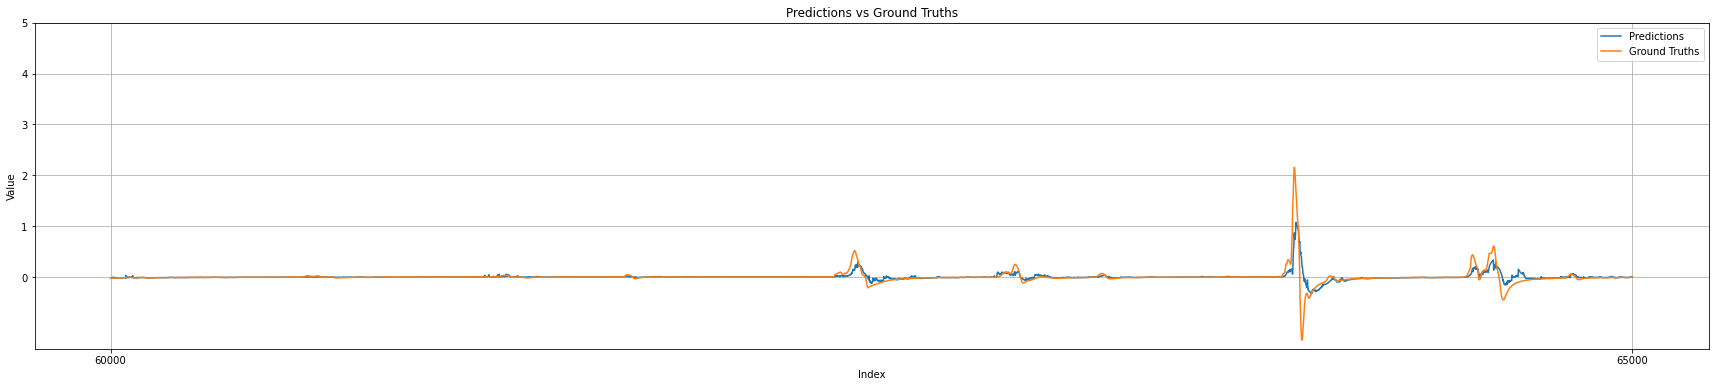

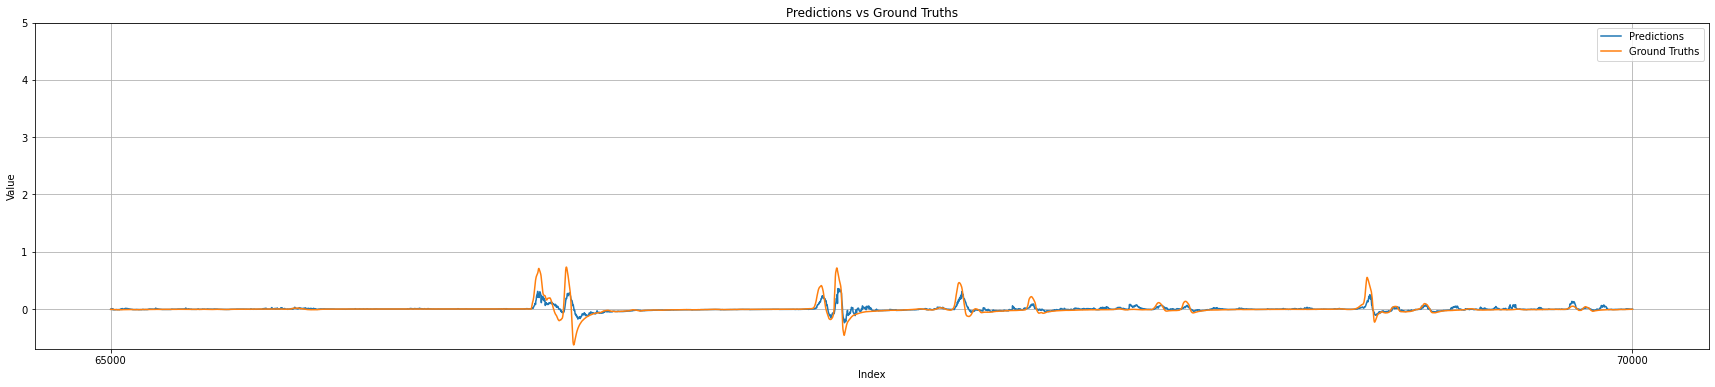

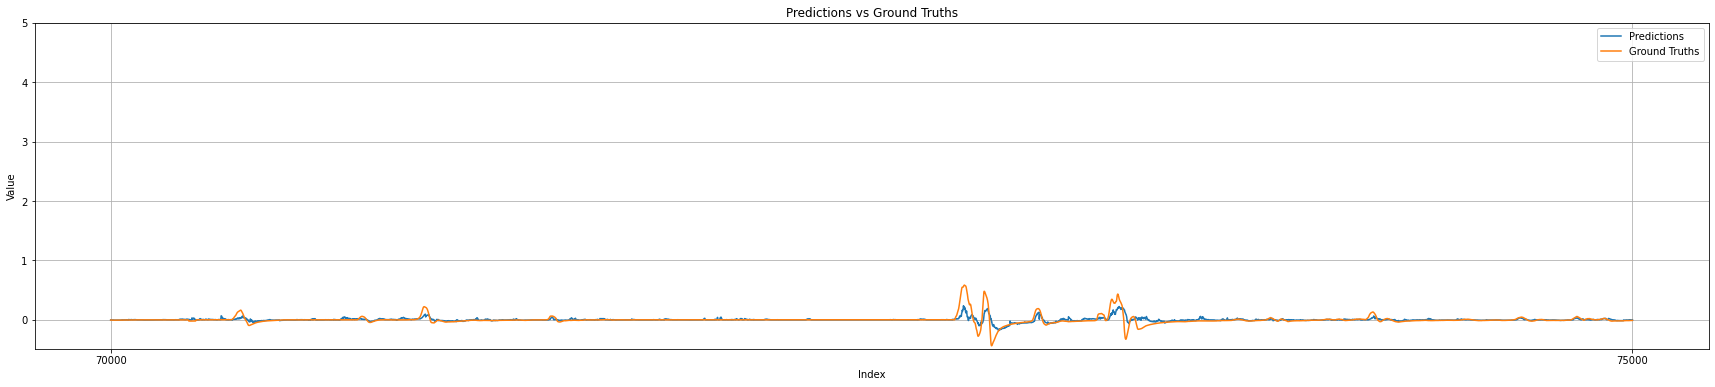

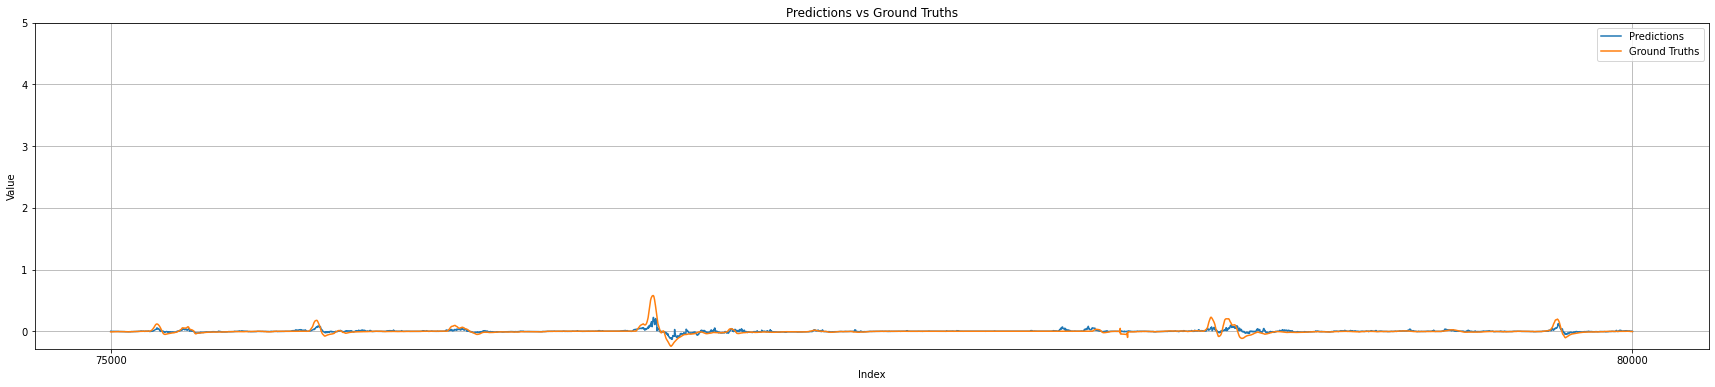

In [4]:
import matplotlib.pyplot as plt
# Plot the data

for i in range(len(predictionsRanged)):
    plt.figure(figsize=(30, 6))
    plt.plot(predictionsRanged[i], label='Predictions')
    plt.plot(ground_truthRanged[i], label='Ground Truths')
    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.title('Predictions vs Ground Truths')
    plt.xticks([0, interval], [str(i*interval), str((i+1) * interval)])
    plt.yticks([0,1,2,3,4,5])
    plt.legend()
    plt.grid(True)
    plt.show()

In [5]:
predictions, ground_truths = load_data(file_path,0,86000)

In [6]:
import pandas as pd

# Replace 'example.csv' with the path to your CSV file
csv_file_path = '../../../river_radar/merged_data.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(csv_file_path)
print(df.head(10))

                 datetimeUTC     1     2     3     4     5     6     7     8  \
0  2015-07-31 00:00:00+00:00 -20.0 -20.0 -20.0 -20.0 -20.0 -20.0 -20.0 -20.0   
1  2015-07-31 00:15:00+00:00 -20.0 -20.0 -20.0 -20.0 -20.0 -20.0 -20.0 -20.0   
2  2015-07-31 00:30:00+00:00 -20.0 -20.0 -20.0 -20.0 -20.0 -20.0 -20.0 -20.0   
3  2015-07-31 00:45:00+00:00 -20.0 -20.0 -20.0 -20.0 -20.0 -20.0 -20.0 -20.0   
4  2015-07-31 01:00:00+00:00 -20.0 -20.0 -20.0 -20.0 -20.0 -20.0 -20.0 -20.0   
5  2015-07-31 01:15:00+00:00 -20.0 -20.0 -20.0 -20.0 -20.0 -20.0 -20.0 -20.0   
6  2015-07-31 01:30:00+00:00 -20.0 -20.0 -20.0 -20.0 -20.0 -20.0 -20.0 -20.0   
7  2015-07-31 01:45:00+00:00 -20.0 -20.0 -20.0 -20.0 -20.0 -20.0 -20.0 -20.0   
8  2015-07-31 02:00:00+00:00 -20.0 -20.0 -20.0 -20.0 -20.0 -20.0 -20.0 -20.0   
9  2015-07-31 02:15:00+00:00 -20.0 -20.0 -20.0 -20.0 -20.0 -20.0 -20.0 -20.0   

      9  ...   415   416   417   418   419   420    Tairua  Opitonui  CR Rain  \
0 -20.0  ... -20.0 -20.0 -20.0 -20.0 -

In [7]:
tairua = df['Tairua'].values
predictions+=tairua[:len(predictions)]
ground_truths+=tairua[:len(predictions)]

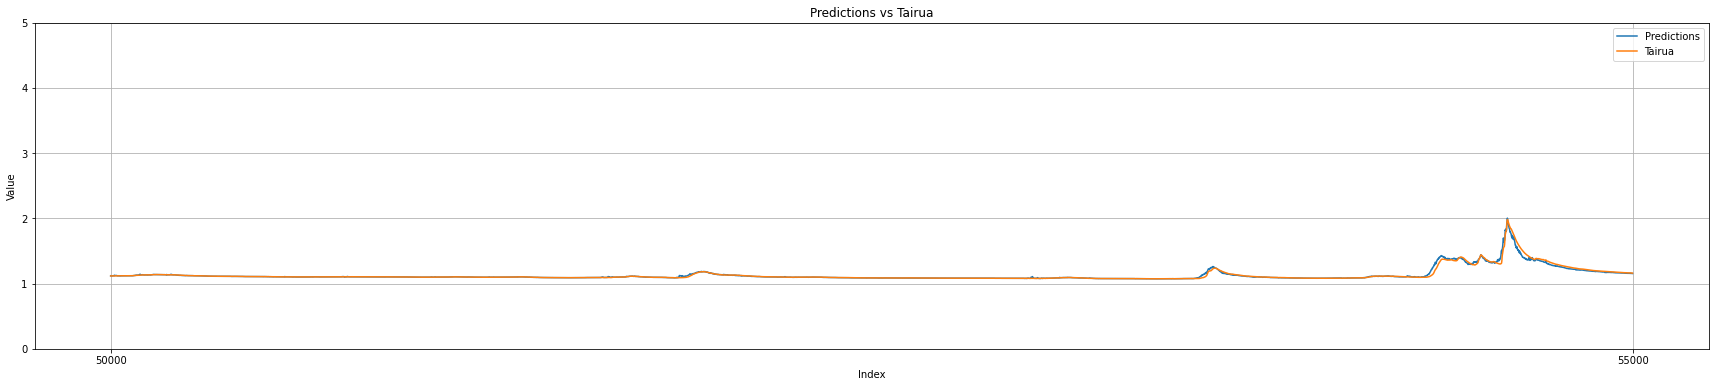

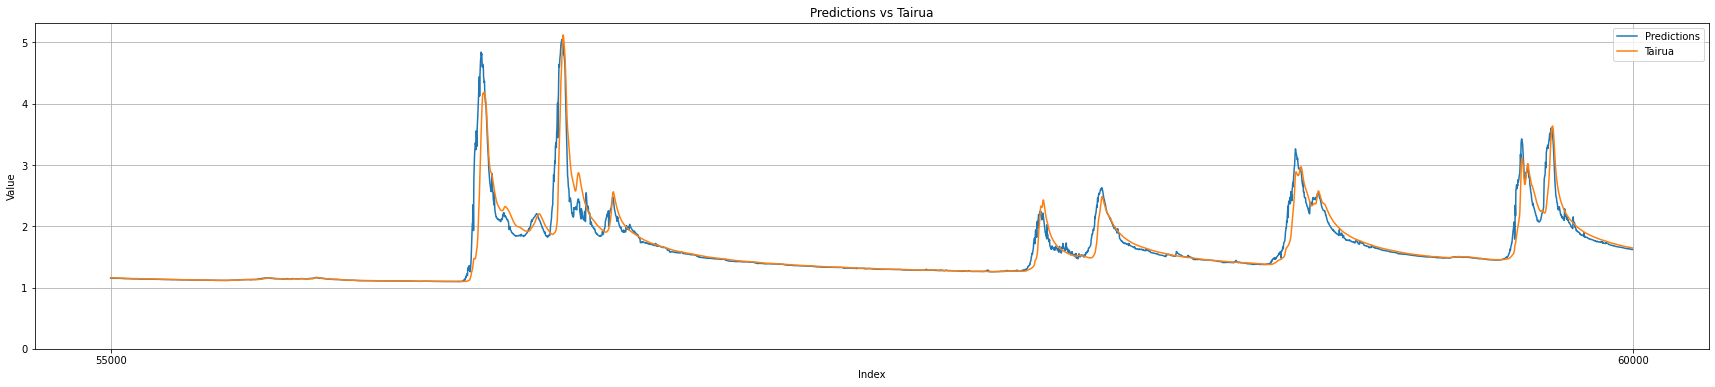

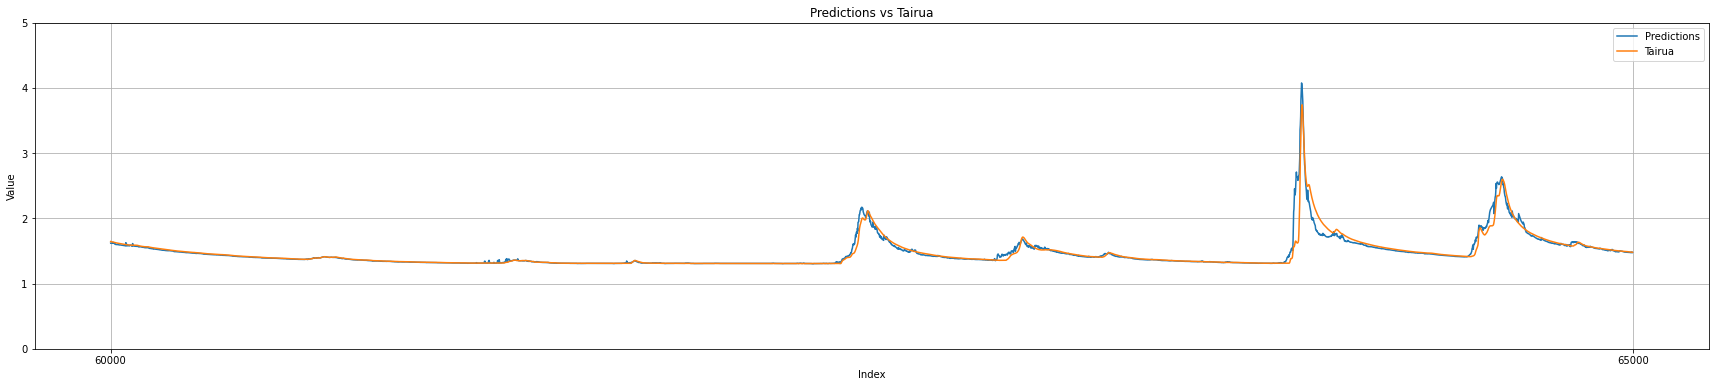

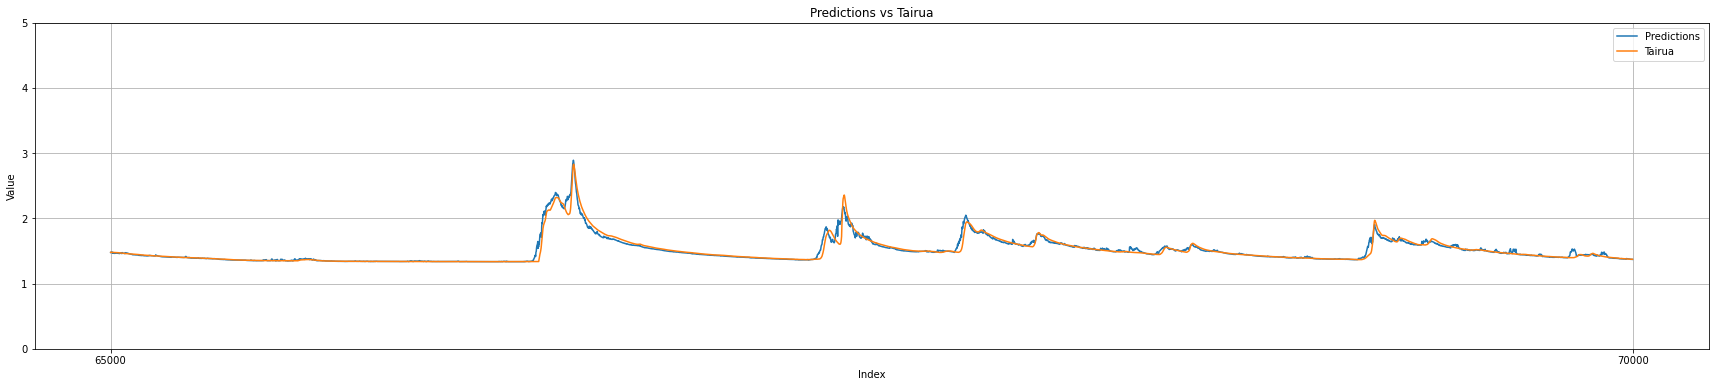

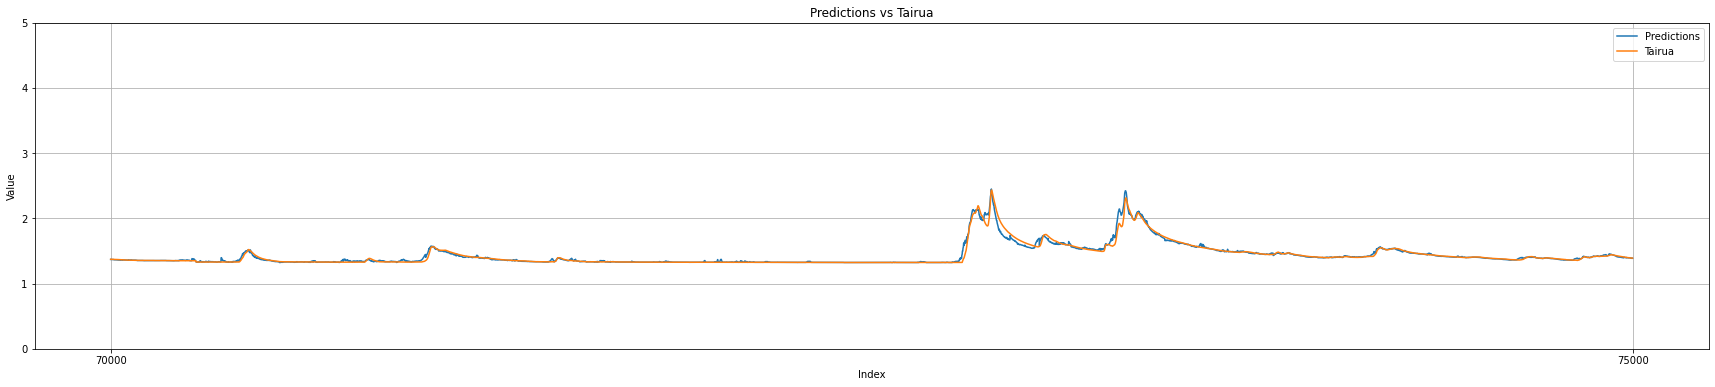

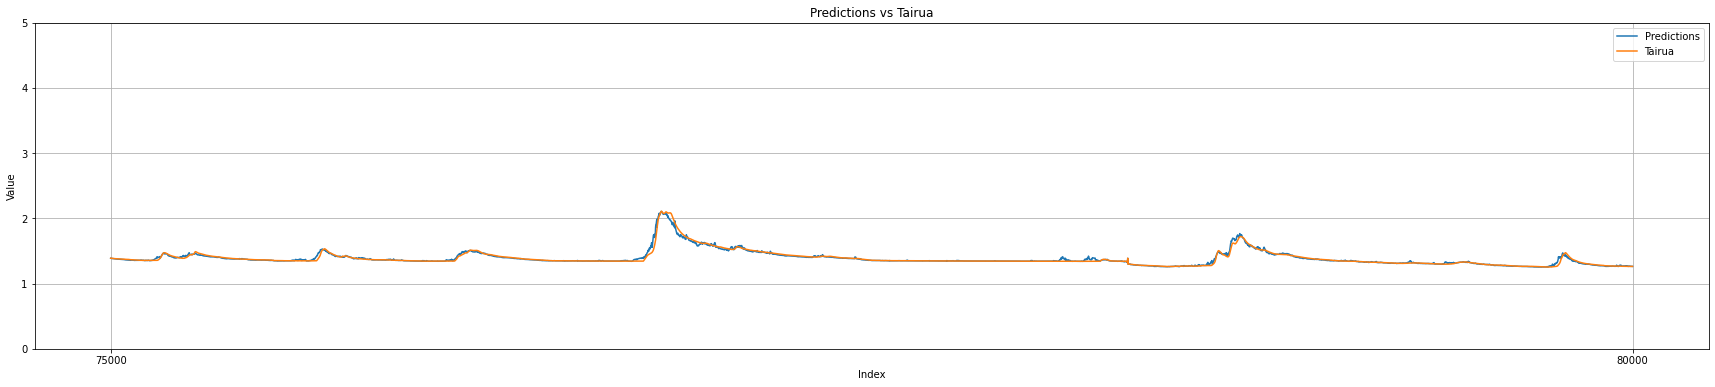

In [8]:
interval = 5000
for i in range(50000, min(80000, 50000+interval*10), interval):
    plt.figure(figsize=(30, 6))
    plt.plot(predictions[i:i+interval], label='Predictions')
    plt.plot(tairua[i:i+interval], label='Tairua')
    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.title('Predictions vs Tairua')
    plt.legend()
    plt.grid(True)
    plt.xticks([0, interval], [str(i), str(i + interval)])
    plt.yticks([0,1,2,3,4,5])
    plt.show()

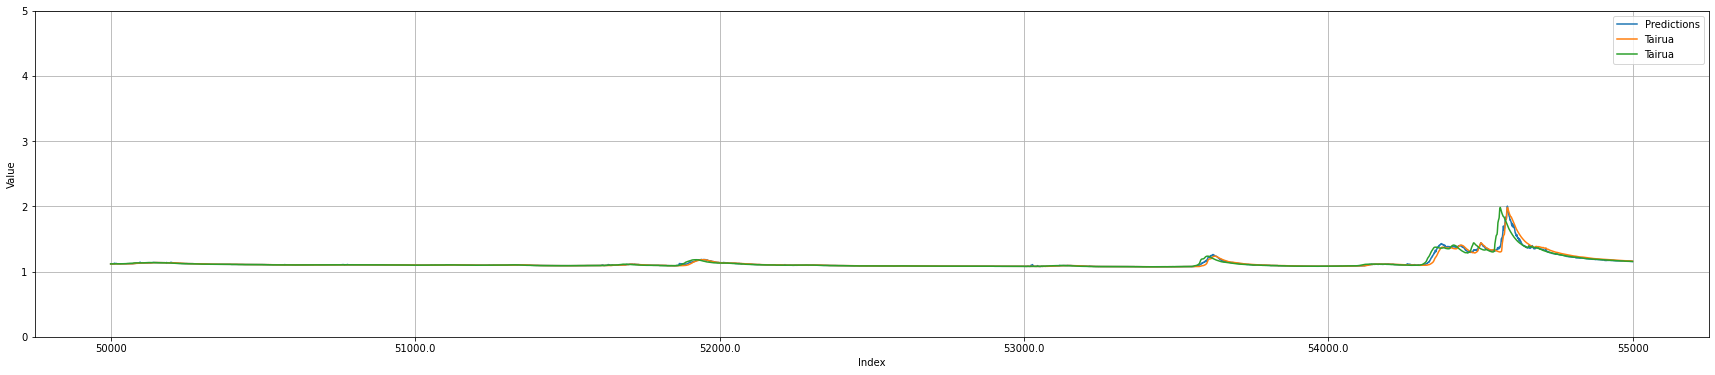

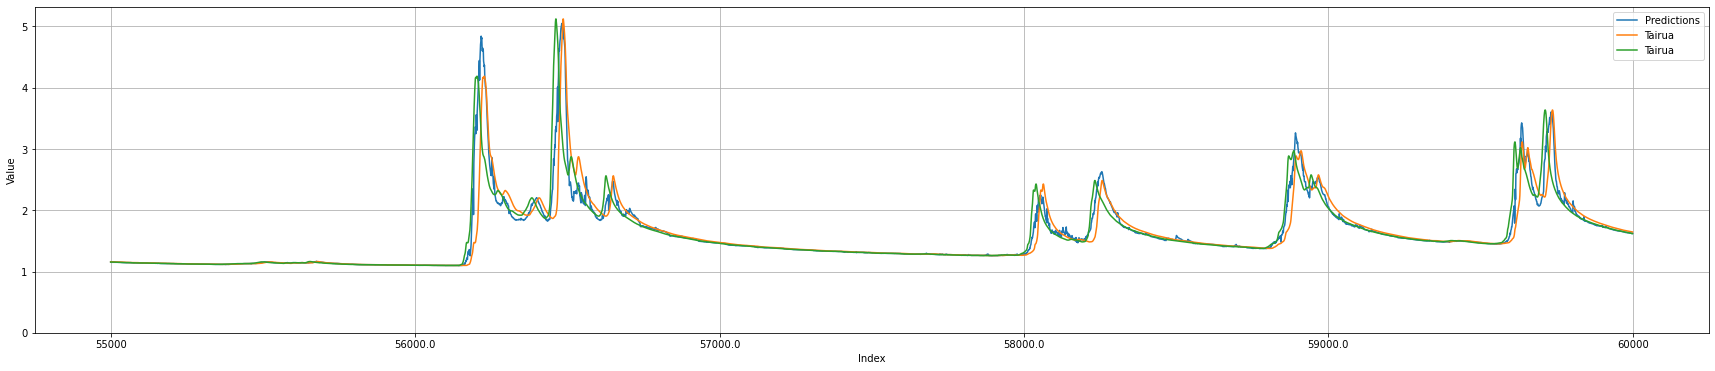

In [9]:
interval = 5000
start = 50000
end = 60000
for i in range(start, min(end, start+interval*10), interval):
    plt.figure(figsize=(30, 6))
    plt.plot(predictions[i:i+interval], label='Predictions')
    plt.plot(tairua[i:i+interval], label='Tairua')
    plt.plot(ground_truths[i:i+interval], label='Tairua')
    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.legend()
    plt.grid(True)
    plt.xticks([0, (0+interval)/5,(0+interval)*2/5,(0+interval)*3/5,(0+interval)*4/5,interval], [str(i), i+interval/5,i+interval*2/5,i+interval*3/5,i+interval*4/5, str(i + interval)])
    plt.yticks([0,1,2,3,4,5])
    plt.show()

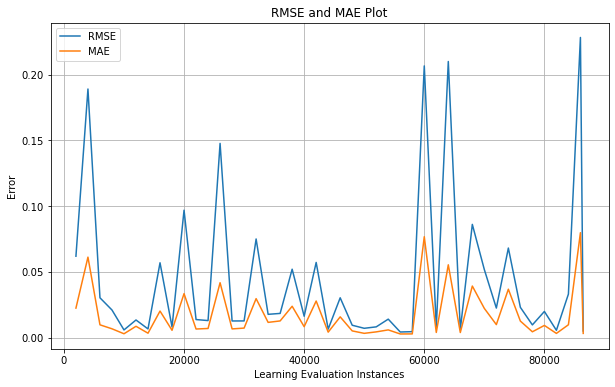

In [10]:
import numpy as np
data = pd.read_csv('dump.csv')

# Extract RMSE and MAE
rmse = data['root mean squared error']
mae = data['mean absolute error']
instances = data['learning evaluation instances']

# Convert to numpy arrays
rmse = np.array(rmse)
mae = np.array(mae)
instances = np.array(instances)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(instances, rmse, label='RMSE')
plt.plot(instances, mae, label='MAE')
plt.title('RMSE and MAE Plot')
plt.xlabel('Learning Evaluation Instances')
plt.ylabel('Error')
plt.legend()
plt.grid(True)
plt.show()

In [11]:
overall_rmse = rmse.mean()
overall_mae = mae.mean()
print("RMSE:" )
print (rmse)
print("MAE:" )
print (mae)
print("Overall RMSE:", overall_rmse)
print("Overall MAE:", overall_mae)

RMSE:
[0.06184095 0.189      0.03021378 0.02093071 0.00577492 0.01333496
 0.0065353  0.05684747 0.00802352 0.09683098 0.01366749 0.01288589
 0.14764509 0.01258431 0.01262313 0.07494817 0.01764313 0.0183268
 0.05195248 0.016183   0.05710389 0.00638815 0.03021871 0.0093439
 0.00701596 0.00810655 0.01397355 0.00419421 0.00445329 0.20657016
 0.00755337 0.20993476 0.00607505 0.08604462 0.05167297 0.02240108
 0.06804922 0.02295391 0.0095954  0.01983121 0.00549304 0.03302339
 0.22820624 0.0049707 ]
MAE:
[0.02237272 0.06113238 0.00965169 0.00663789 0.0028522  0.0085404
 0.00328882 0.02011904 0.00550286 0.03336875 0.00646522 0.0068793
 0.04167716 0.00655151 0.00717045 0.02956393 0.01151848 0.01261663
 0.02377362 0.00824422 0.02775748 0.0040864  0.01571801 0.00503583
 0.00318044 0.00428696 0.00579793 0.00269526 0.00274664 0.07667093
 0.00385473 0.05529896 0.00379563 0.03914624 0.02213833 0.00982638
 0.03674774 0.01250161 0.0043641  0.0091981  0.00313174 0.00969603
 0.07973731 0.00313689]
Overall